In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/wine.csv')
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
df.tail()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [ ]:
df.describe()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [ ]:
df.isnull().sum()

,0
Wine,0
Alcohol,0
Malic.acid,0
Ash,0
Acl,0
Mg,0
Phenols,0
Flavanoids,0
Nonflavanoid.phenols,0
Proanth,0


In [ ]:
df['Wine'].value_counts()

,count
Wine,
2,71
1,59
3,48


In [ ]:
y=df["Wine"]
X = df.drop(columns=["Wine"])

Understanding class distribution informs decisions about modeling techniques, evaluation metrics, and potential data preprocessing.

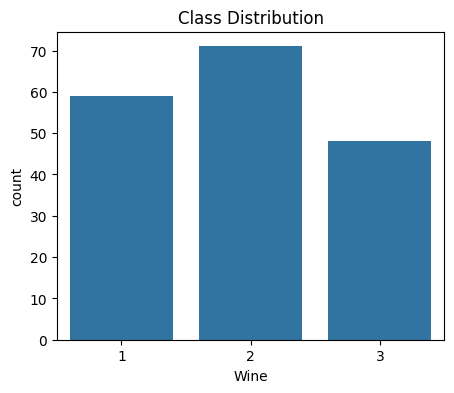

In [ ]:
# Class distribution
import seaborn as sns
plt.figure(figsize=(5,4))
sns.countplot(x=y)
plt.title("Class Distribution")
plt.show()

Knowing the dataset structure ensures that we can properly prepare, visualize, and model the data without errors.

In [ ]:
print("shape X:", X.shape, "shape y:", y.shape)

shape X: (178, 13) shape y: (178,)


In [ ]:
feature_names = list(df.columns)
feature_names

['Wine',
 'Alcohol',
 'Malic.acid',
 'Ash',
 'Acl',
 'Mg',
 'Phenols',
 'Flavanoids',
 'Nonflavanoid.phenols',
 'Proanth',
 'Color.int',
 'Hue',
 'OD',
 'Proline']


Visualizing the distribution of features is an important step in
exploratory data analysis (EDA).

Helps detect skewed data, outliers, or unusual patterns that may affect modeling.

Guides preprocessing decisions like normalization, scaling, or log transformation.

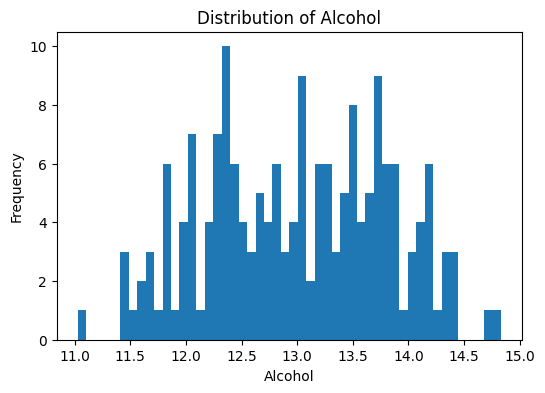

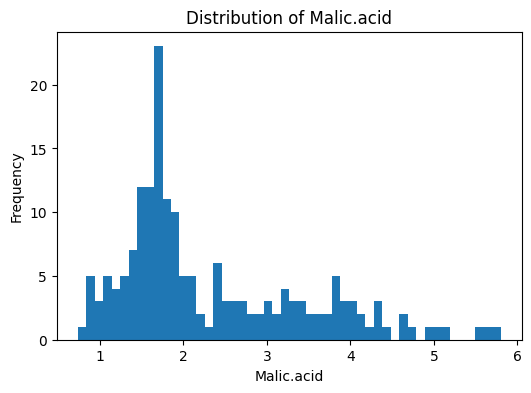

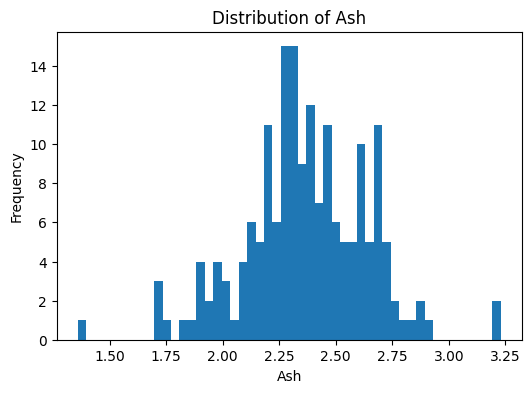

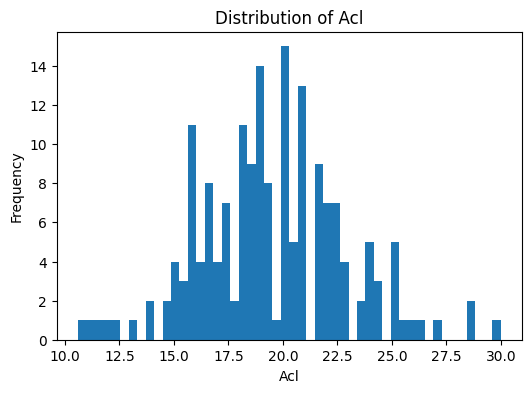

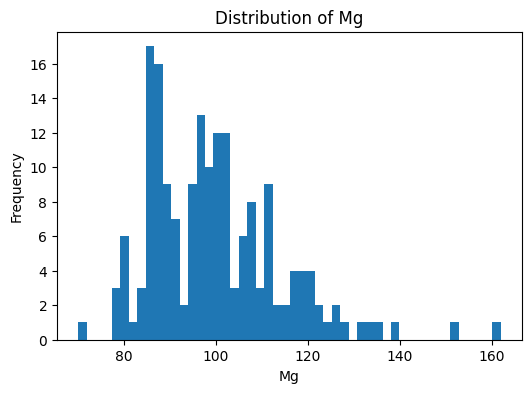

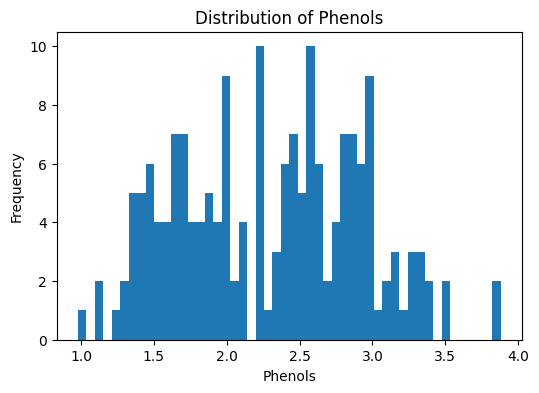

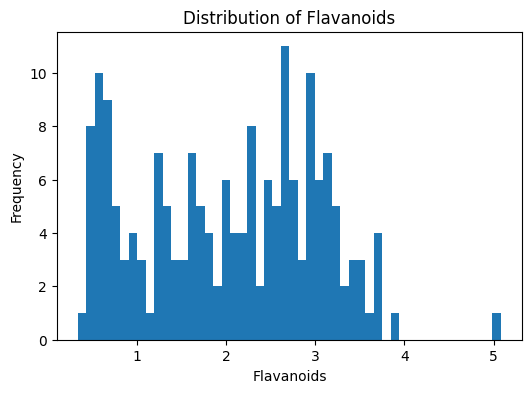

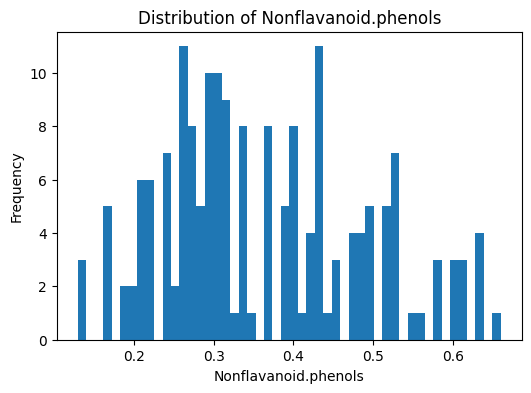

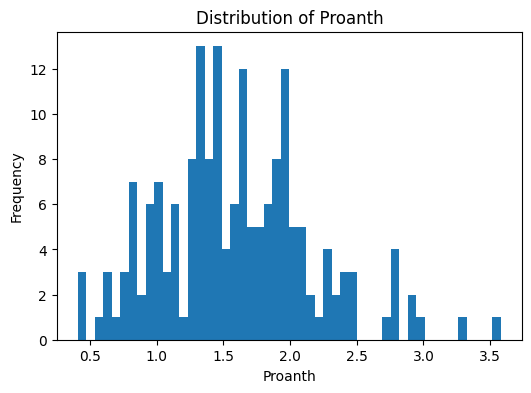

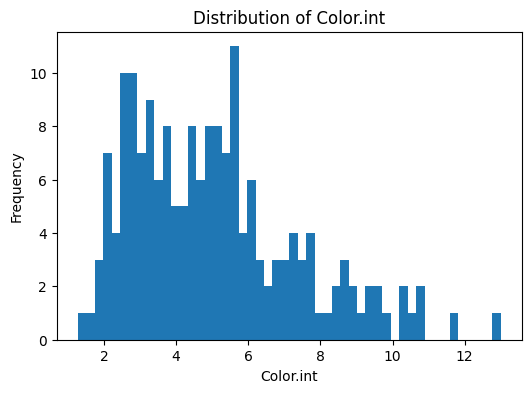

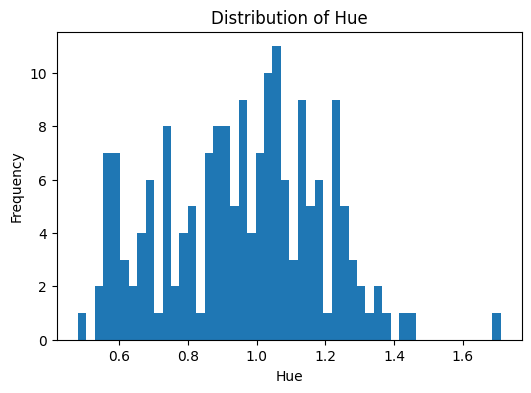

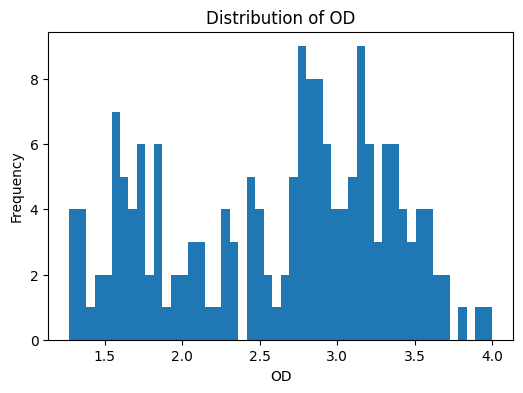

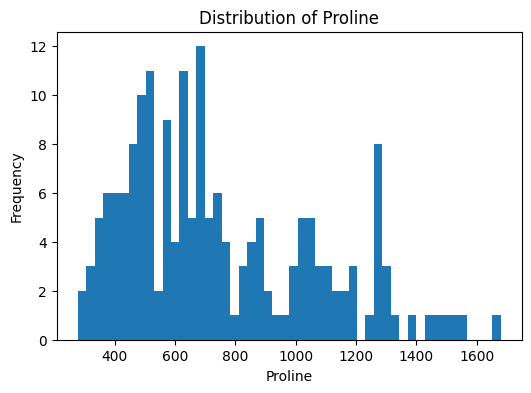

In [ ]:
import matplotlib.pyplot as plt

# Plot histograms for each feature in X
for column in X.columns:
    plt.figure(figsize=(6, 4))
    plt.hist(X[column], bins=50)
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {column}")
    plt.show()


#Loop through all features:

We iterate over every column (feature) in the dataset to compute its descriptive statistics.

**Skewness**:

X[column].skew() calculates the skewness of the feature.

Skewness measures asymmetry of the distribution:

Skewness ≈ 0 → roughly symmetric

Skewness > 0 → right-skewed (tail on the right)

Skewness < 0 → left-skewed (tail on the left)

**Kurtosis**:

X[column].kurtosis() calculates the kurtosis, which measures the tailedness of the distribution:

Kurtosis ≈ 0 → similar to normal distribution

Kurtosis > 0 → heavy tails (more outliers)

Kurtosis < 0 → light tails (fewer extreme values)


**Why this matters**:

Understanding skewness and kurtosis helps decide if preprocessing is needed, like log transformation for skewed data or scaling for features with extreme values.

It also helps detect anomalies and informs feature engineering and model selection.

In [ ]:
for column in X.columns:
    print(f"Feature: {column}")
    print(f"  Skewness: {X[column].skew():.2f}")
    print(f"  Kurtosis: {X[column].kurtosis():.2f}")
    print("\n")

Feature: Alcohol
  Skewness: -0.05
  Kurtosis: -0.85


Feature: Malic.acid
  Skewness: 1.04
  Kurtosis: 0.30


Feature: Ash
  Skewness: -0.18
  Kurtosis: 1.14


Feature: Acl
  Skewness: 0.21
  Kurtosis: 0.49


Feature: Mg
  Skewness: 1.10
  Kurtosis: 2.10


Feature: Phenols
  Skewness: 0.09
  Kurtosis: -0.84


Feature: Flavanoids
  Skewness: 0.03
  Kurtosis: -0.88


Feature: Nonflavanoid.phenols
  Skewness: 0.45
  Kurtosis: -0.64


Feature: Proanth
  Skewness: 0.52
  Kurtosis: 0.55


Feature: Color.int
  Skewness: 0.87
  Kurtosis: 0.38


Feature: Hue
  Skewness: 0.02
  Kurtosis: -0.34


Feature: OD
  Skewness: -0.31
  Kurtosis: -1.09


Feature: Proline
  Skewness: 0.77
  Kurtosis: -0.25





#Loop through all features:

for column in X.columns: iterates over each feature to create a separate box plot. This ensures we analyze the spread of each variable individually.

**Box plot**:
plt.boxplot(X[column]) draws a box plot for the feature.

A box plot shows the median, quartiles, and potential outliers in the data.

The box represents the interquartile range (IQR), the line inside the box is the median, and points outside the whiskers indicate outliers.

**Why this matters**:

Box plots are useful for detecting outliers and skewness.

They provide a visual summary of the spread and central tendency of each feature.

Understanding data distribution and extreme values helps guide data preprocessing, normalization, or transformation before modeling.

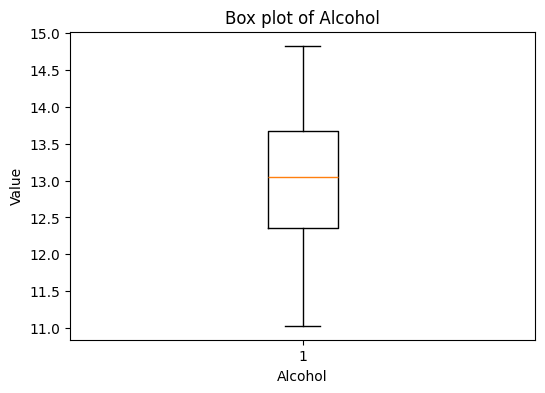

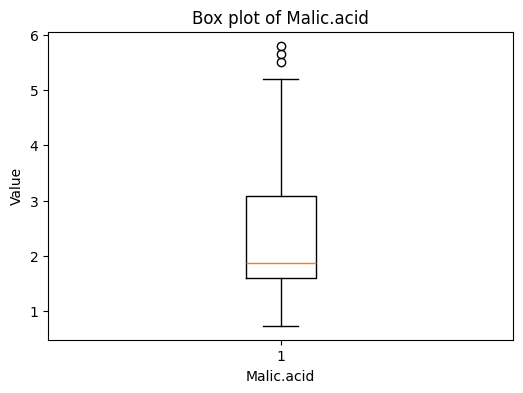

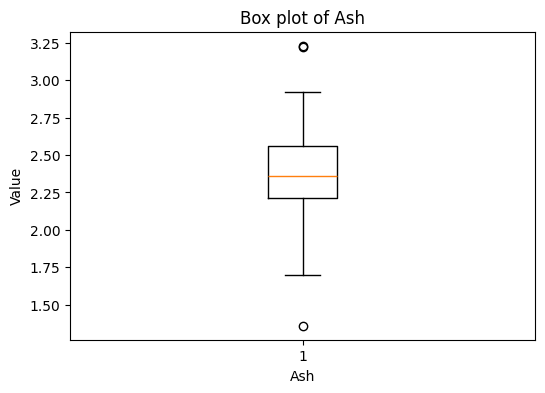

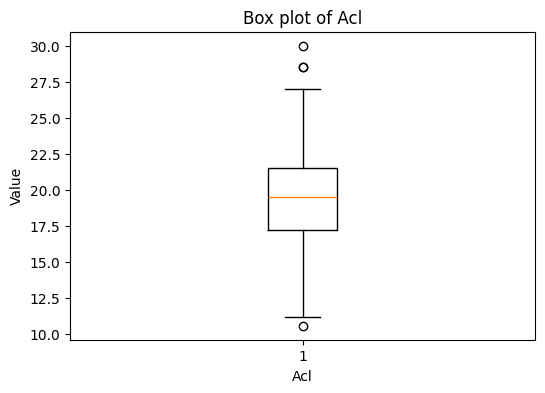

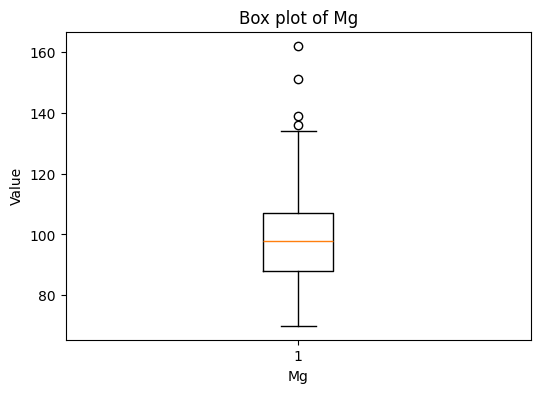

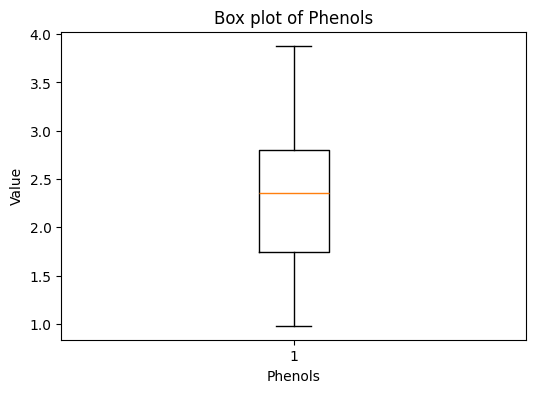

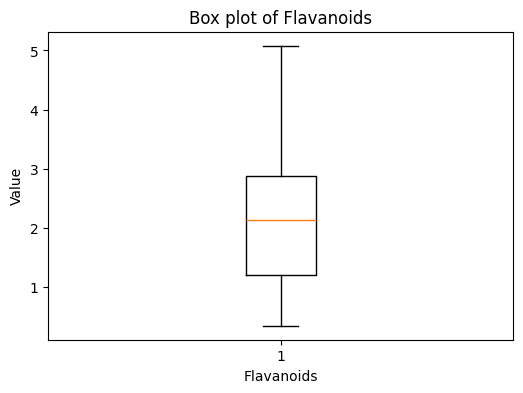

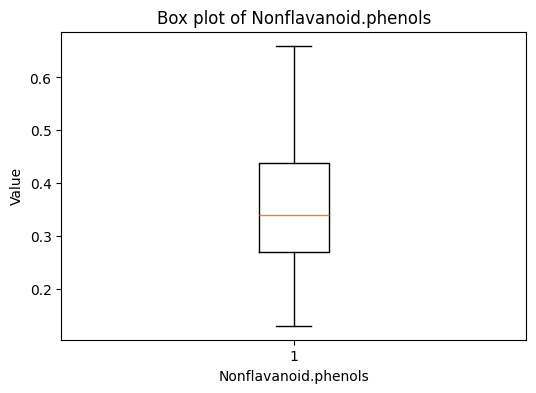

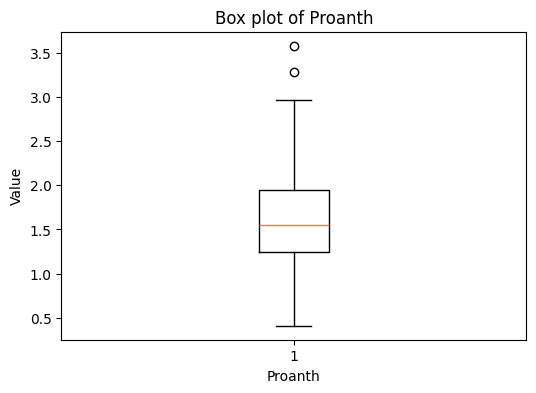

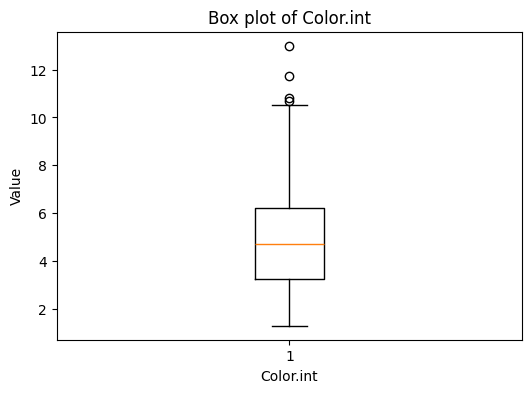

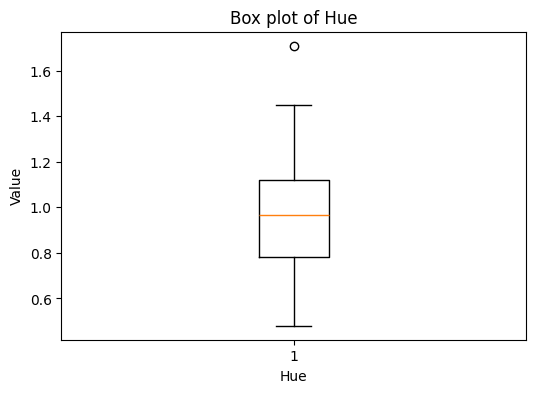

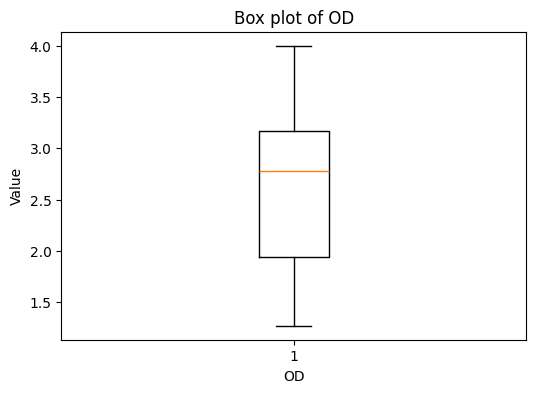

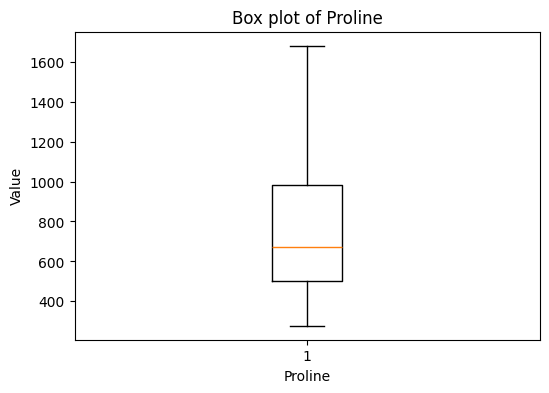

In [ ]:
import matplotlib.pyplot as plt

# Plot box plots for each feature in X
for column in X.columns:
    plt.figure(figsize=(6, 4))
    plt.boxplot(X[column])
    plt.xlabel(column)
    plt.ylabel("Value")
    plt.title(f"Box plot of {column}")
    plt.show()



1. **Function Purpose:**
   The function removes **outliers** from the dataset using the **IQR (Interquartile Range) method**.

2. **Copying the data:**
   Using `df.copy()` ensures that the original dataset remains unchanged while we perform cleaning operations.

3. **Selecting columns:**
   If no specific columns are provided, all **numeric columns** are checked for outliers, since only numeric data can be analyzed with IQR.

4. **Calculating IQR:**

   * Q1 = first quartile, Q3 = third quartile
   * IQR = Q3 − Q1, which represents the **middle 50% spread** of the data

5. **Defining outlier boundaries:**

   * Values below `Q1 − 1.5 * IQR` are considered **outliers**
   * Values above `Q3 + 1.5 * IQR` are considered **outliers**

6. **Identifying and storing outliers:**
   The number of outliers for each column is stored in `outlier_info`, providing a summary of removed values.

7. **Removing outliers:**
   Only rows within the defined boundaries for each column are kept in the cleaned dataset.

8. **Function output:**
   Returns the **cleaned dataset** and a summary of **outliers removed for each column**.

**Why it matters:**

* Outliers can **distort statistical analysis** and **reduce model accuracy**.
* The IQR method is a **robust, non-parametric approach** suitable for skewed or non-normal data.
* Keeping track of removed outliers helps with **data cleaning documentation** and ensures reproducibility of the analysis.



In [ ]:
def remove_outliers_iqr(df, columns=None):


    df_clean = df.copy()
    outlier_info = {}

    if columns is None:
        columns = df_clean.select_dtypes(include=np.number).columns

    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df_clean[
            (df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)
        ]

        outlier_info[col] = outliers.shape[0]

        df_clean = df_clean[
            (df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)
        ]

    return df_clean, outlier_info


In [ ]:
print("Shape before removing outliers:", df.shape)

df_clean, outlier_info = remove_outliers_iqr(df)

print("Shape after removing outliers:", df_clean.shape)

print("\nOutliers removed per column:")
for col, count in outlier_info.items():
    print(f"{col}: {count}")


Shape before removing outliers: (178, 14)
Shape after removing outliers: (161, 14)

Outliers removed per column:
Wine: 0
Alcohol: 0
Malic.acid: 3
Ash: 3
Acl: 2
Mg: 3
Phenols: 0
Flavanoids: 0
Nonflavanoid.phenols: 0
Proanth: 2
Color.int: 3
Hue: 1
OD: 0
Proline: 0


In [ ]:
Q1 = df_clean[column].quantile(0.25)
Q3 = df_clean[column].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print("Remaining values outside IQR bounds:",
      ((df_clean[column] < lower) | (df_clean[column] > upper)).sum())


Remaining values outside IQR bounds: 0


In [ ]:

X_clean, outlier_report = remove_outliers_iqr(X)

y_clean = y.loc[X_clean.index]

print("Original shape of X:", X.shape)
print("Cleaned shape of X:", X_clean.shape)
print("Original shape of y:", y.shape)
print("Cleaned shape of y:", y_clean.shape)


Original shape of X: (178, 13)
Cleaned shape of X: (161, 13)
Original shape of y: (178,)
Cleaned shape of y: (161,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_clean,
    y_clean,
    test_size=0.2,
    random_state=42,
    stratify=y_clean
)



1. **Pipeline:** Chains the steps of **data standardization** and **SVM training** into a single workflow, making the modeling process organized and reproducible.

2. **StandardScaler:** Standardizes feature values to have **zero mean and unit variance**. This is essential for SVM because the algorithm is sensitive to feature scales.

3. **SVC:** The Support Vector Machine algorithm used for **classification** tasks.

4. **param_grid:** A set of hyperparameter values to tune the model, including:

   * `C` → controls the trade-off between **training accuracy and model complexity**
   * `gamma` → defines the influence of individual samples in the RBF kernel
   * `kernel` → the type of SVM kernel, either **linear** or **RBF**

5. **GridSearchCV:** Evaluates **all combinations of hyperparameters** using cross-validation and selects the **best performing model**.

6. **fit:** Trains the pipeline on the training data and selects the optimal hyperparameters.

**Why it matters:**

* Prevents **data leakage** by ensuring consistent preprocessing.
* Enables **automatic hyperparameter optimization** to improve model accuracy.
* **Cross-validation** provides a reliable estimate of model performance on unseen data.



In [ ]:
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC())
])

param_grid = {
    "svm__C": [0.1, 1, 10, 100],
    "svm__gamma": [0.001, 0.01, 0.1, 1],
    "svm__kernel": ["linear", "rbf"]
}

grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm', SVC())]),
             n_jobs=-1,
             param_grid={'svm__C': [0.1, 1, 10, 100],
                         'svm__gamma': [0.001, 0.01, 0.1, 1],
                         'svm__kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [ ]:
best_model = grid.best_estimator_

y_pred = best_model.predict(X_test)

print("Best parameters:", grid.best_params_)
print("Test accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Best parameters: {'svm__C': 10, 'svm__gamma': 0.001, 'svm__kernel': 'rbf'}
Test accuracy: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00         9

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/breast-cancer.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [ ]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
data.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [ ]:
data['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


In [ ]:
y=data['diagnosis']
X = data.drop(columns=['diagnosis'])

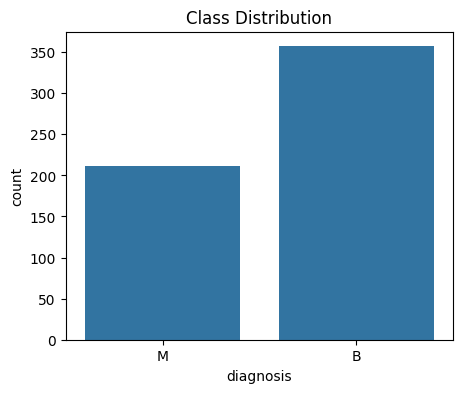

In [ ]:
# Class distribution
import seaborn as sns
plt.figure(figsize=(5,4))
sns.countplot(x=y)
plt.title("Class Distribution")
plt.show()

In [ ]:
print("shape X:", X.shape, "shape y:", y.shape)

shape X: (569, 31) shape y: (569,)


In [ ]:
feature_names = list(df.columns)
feature_names

['id',
 'diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

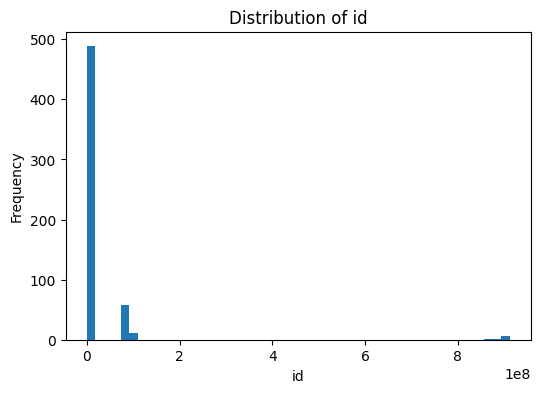

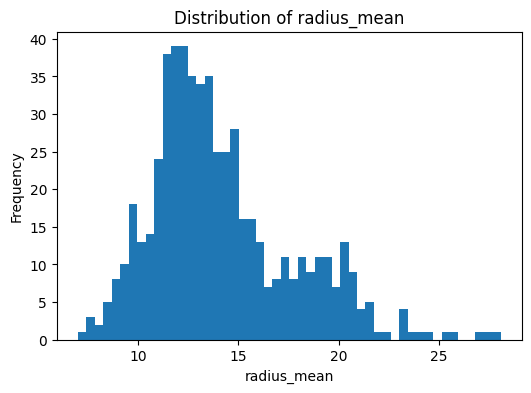

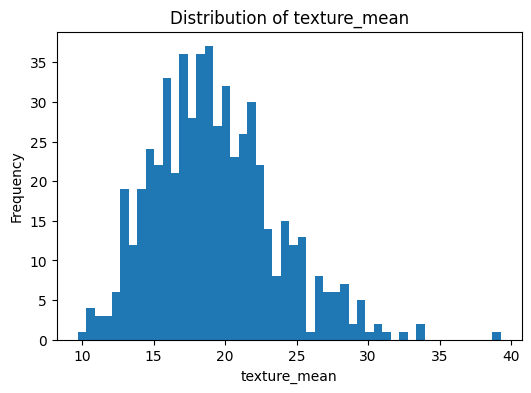

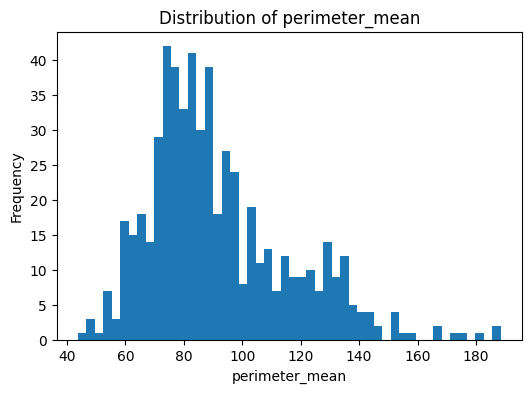

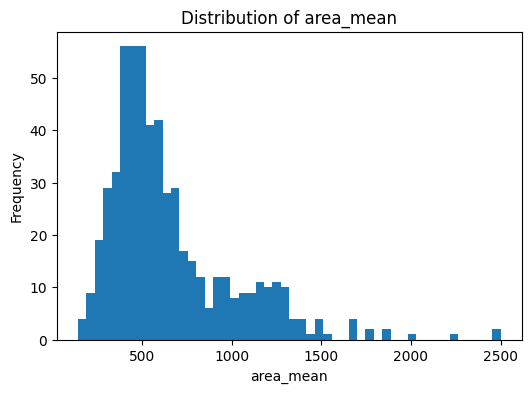

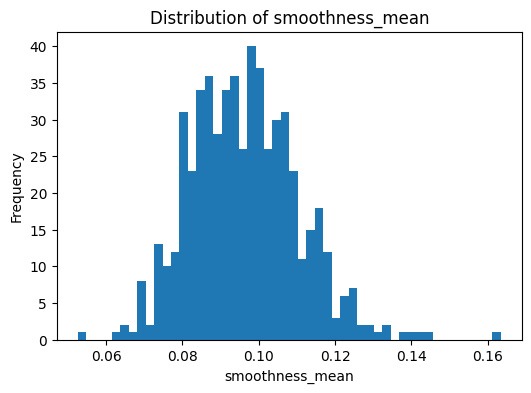

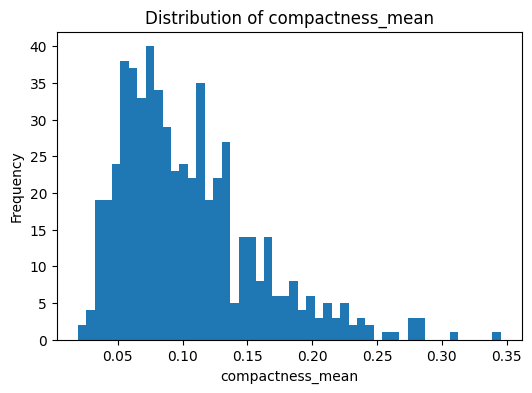

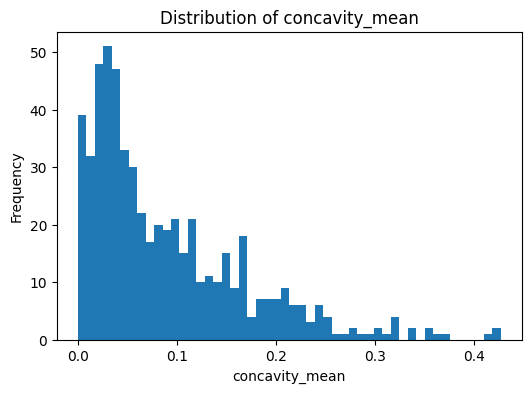

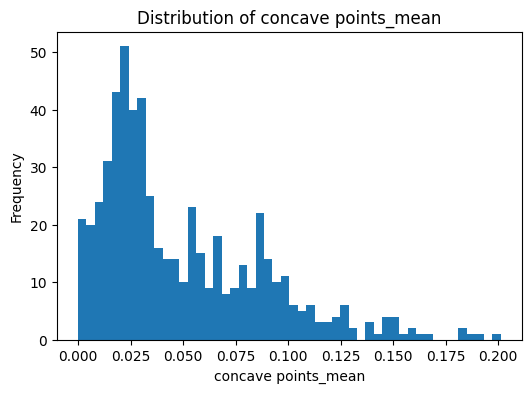

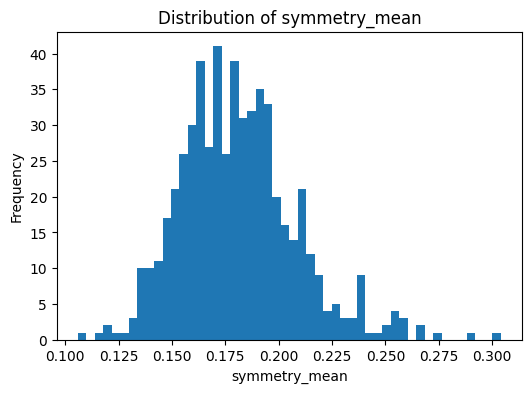

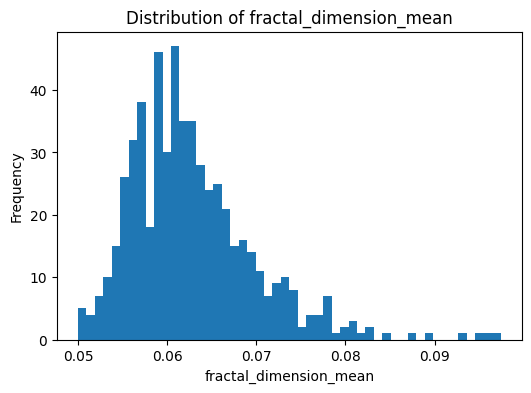

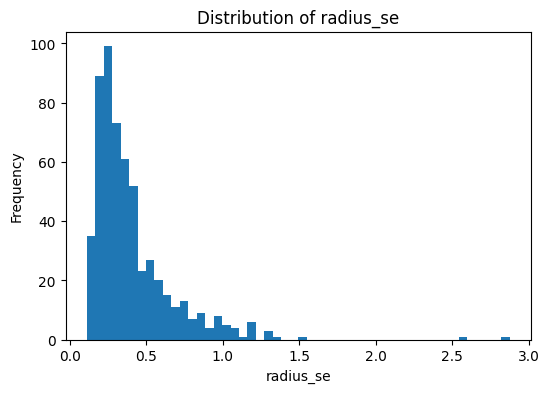

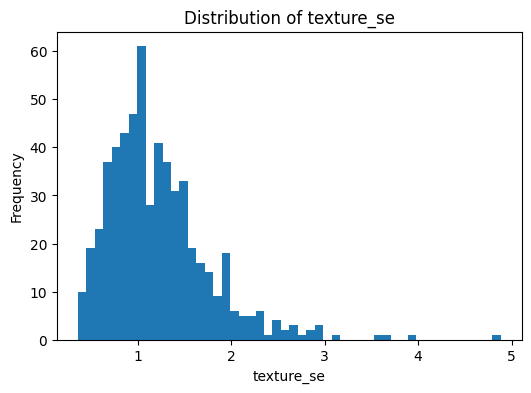

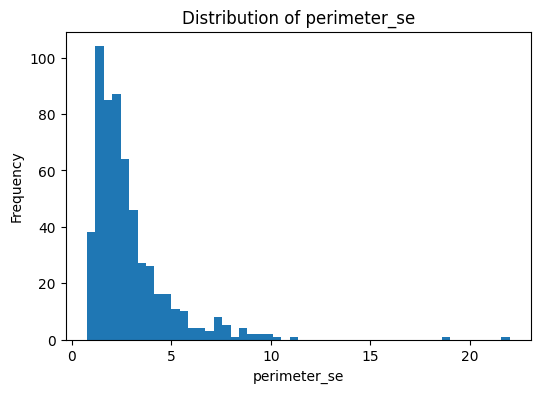

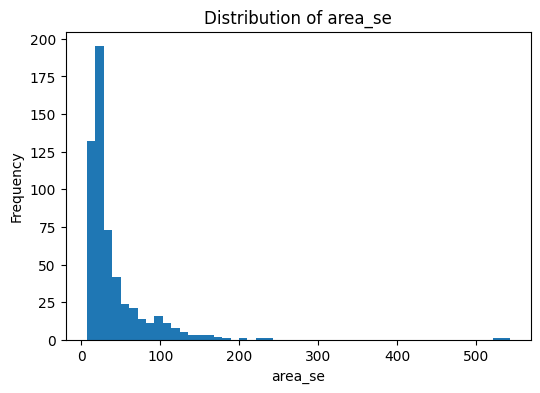

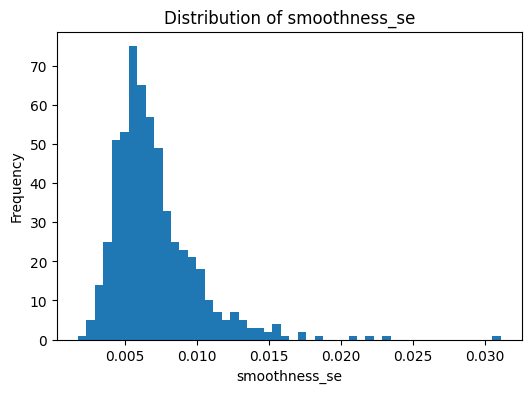

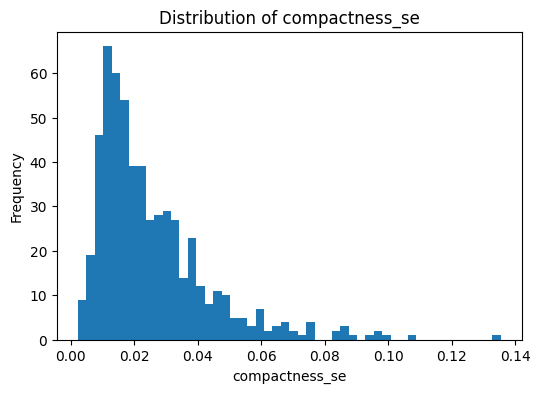

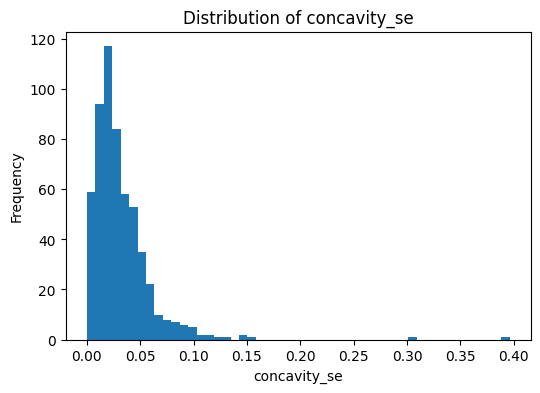

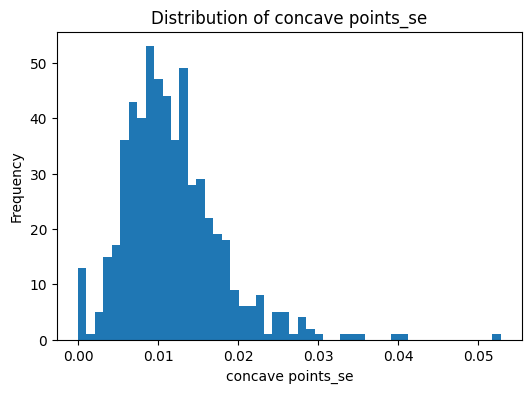

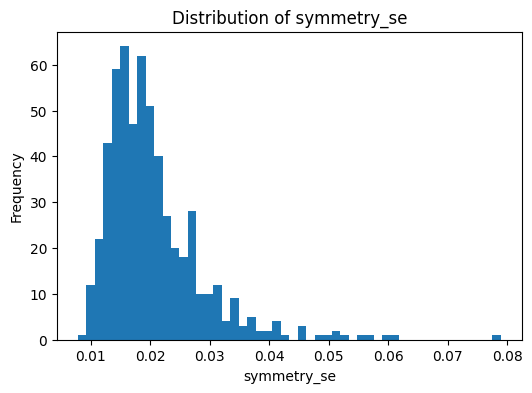

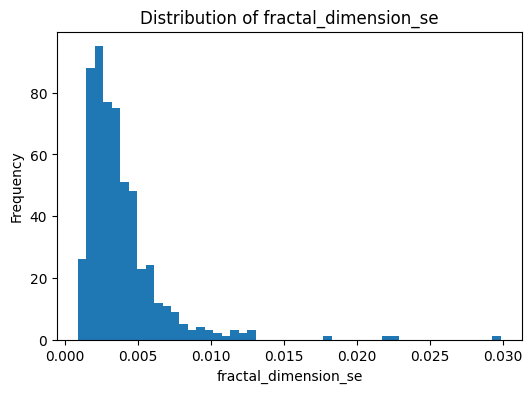

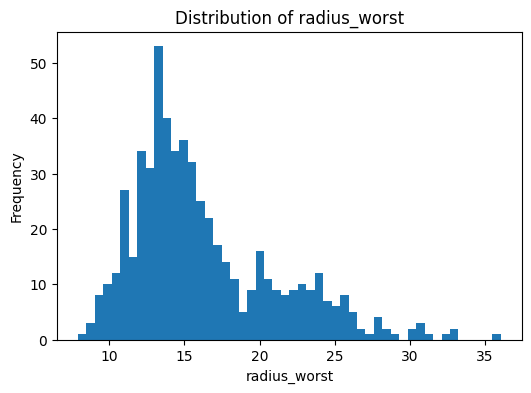

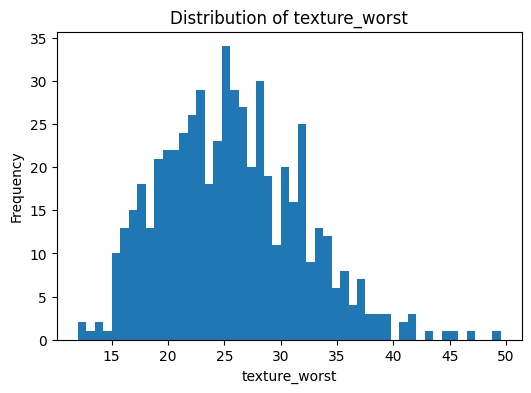

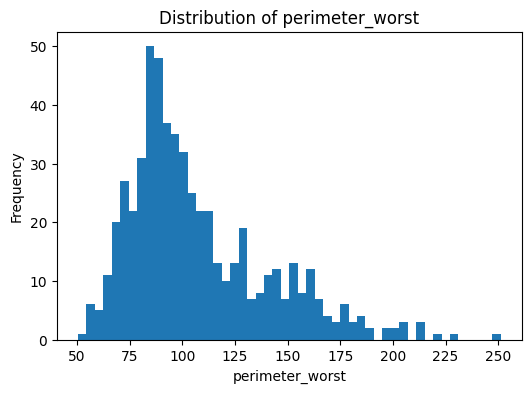

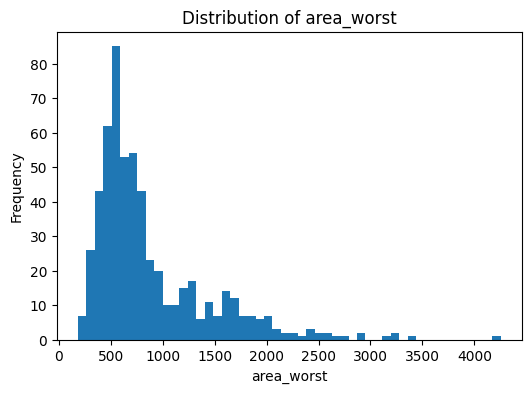

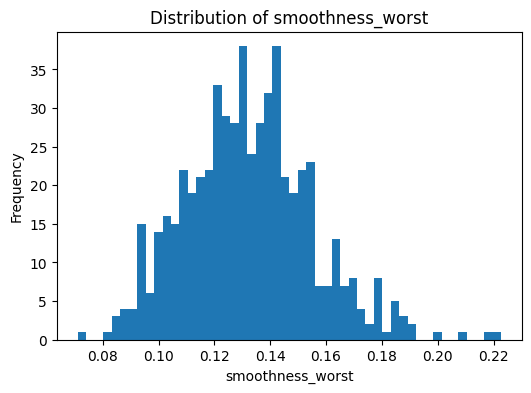

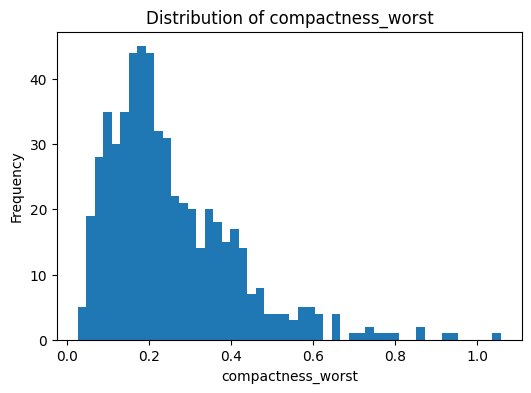

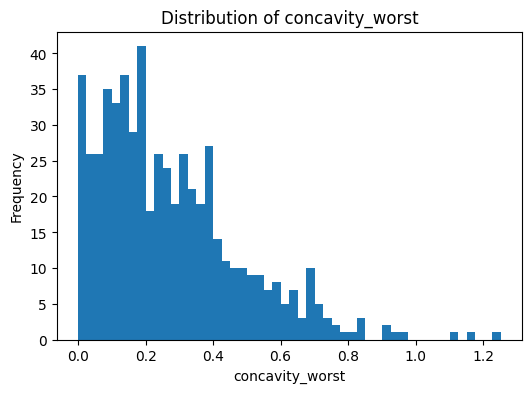

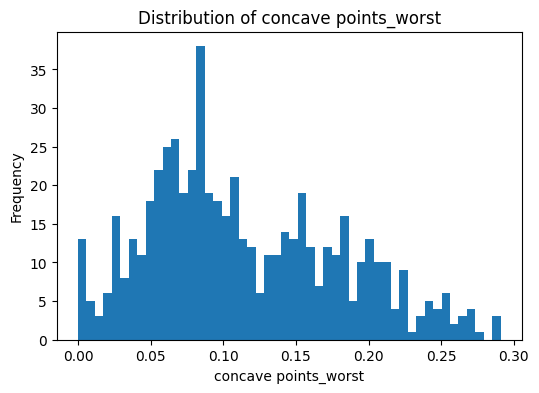

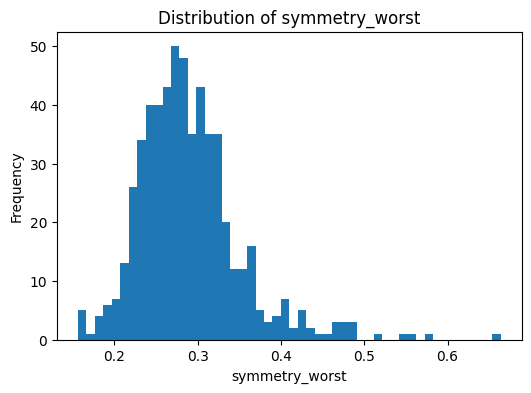

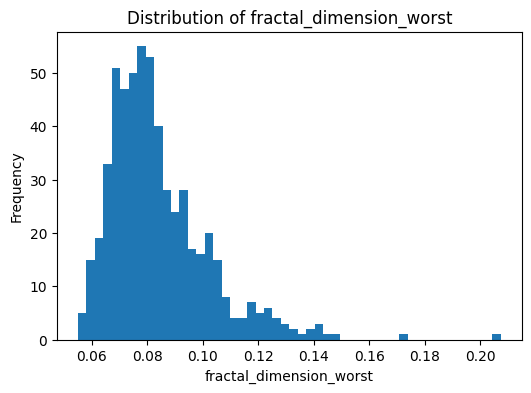

In [ ]:
# Plot histograms for each feature in X
for column in X.columns:
    plt.figure(figsize=(6, 4))
    plt.hist(X[column], bins=50)
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {column}")
    plt.show()

In [ ]:
for column in X.columns:
    print(f"Feature: {column}")
    print(f"  Skewness: {X[column].skew():.2f}")
    print(f"  Kurtosis: {X[column].kurtosis():.2f}")
    print("\n")

Feature: id
  Skewness: 6.47
  Kurtosis: 42.19


Feature: radius_mean
  Skewness: 0.94
  Kurtosis: 0.85


Feature: texture_mean
  Skewness: 0.65
  Kurtosis: 0.76


Feature: perimeter_mean
  Skewness: 0.99
  Kurtosis: 0.97


Feature: area_mean
  Skewness: 1.65
  Kurtosis: 3.65


Feature: smoothness_mean
  Skewness: 0.46
  Kurtosis: 0.86


Feature: compactness_mean
  Skewness: 1.19
  Kurtosis: 1.65


Feature: concavity_mean
  Skewness: 1.40
  Kurtosis: 2.00


Feature: concave points_mean
  Skewness: 1.17
  Kurtosis: 1.07


Feature: symmetry_mean
  Skewness: 0.73
  Kurtosis: 1.29


Feature: fractal_dimension_mean
  Skewness: 1.30
  Kurtosis: 3.01


Feature: radius_se
  Skewness: 3.09
  Kurtosis: 17.69


Feature: texture_se
  Skewness: 1.65
  Kurtosis: 5.35


Feature: perimeter_se
  Skewness: 3.44
  Kurtosis: 21.40


Feature: area_se
  Skewness: 5.45
  Kurtosis: 49.21


Feature: smoothness_se
  Skewness: 2.31
  Kurtosis: 10.47


Feature: compactness_se
  Skewness: 1.90
  Kurtosis: 5.11


F


Purpose: Detect and remove extreme outlier values in the Breast Cancer dataset.

Method: IQR (Interquartile Range) for each numeric column.

Outcome: Cleaned dataset with fewer extreme values and a record of outliers removed per feature.

Why important: Improves model stability and ensures reproducibility of preprocessing steps.

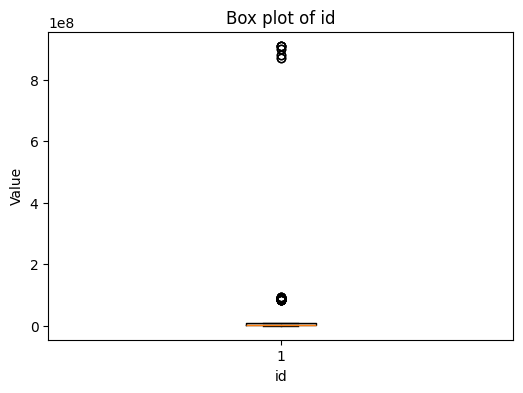

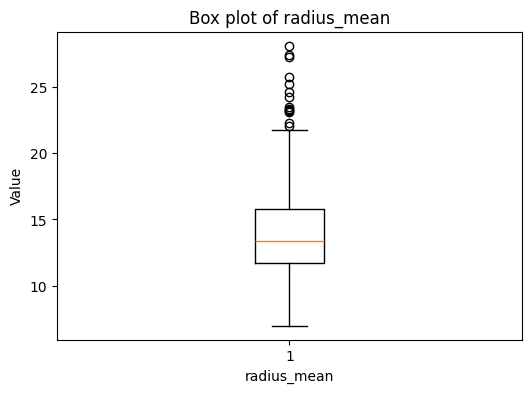

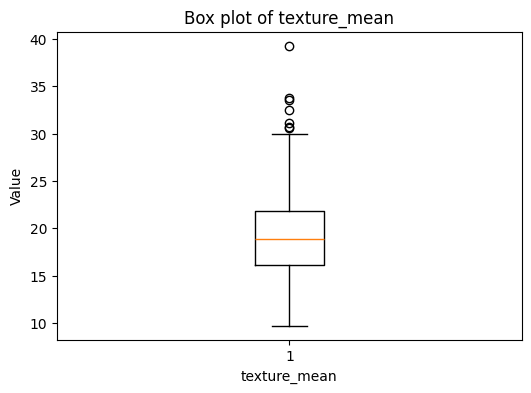

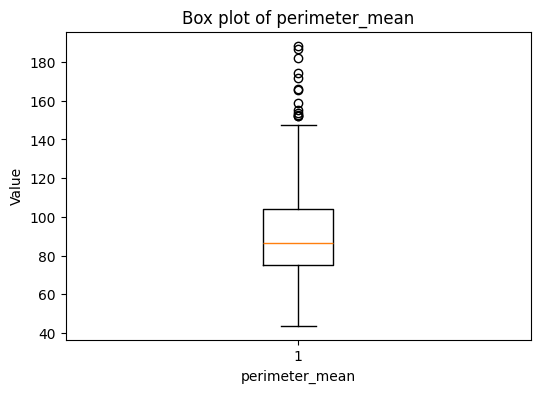

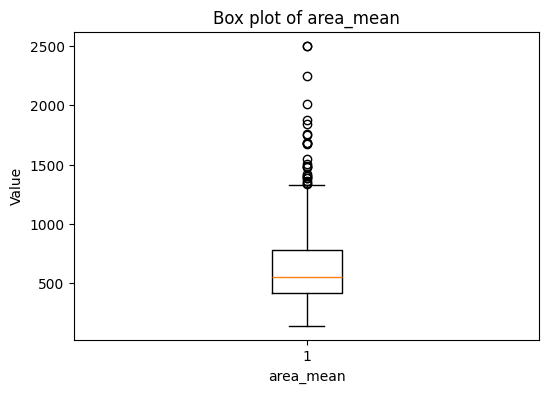

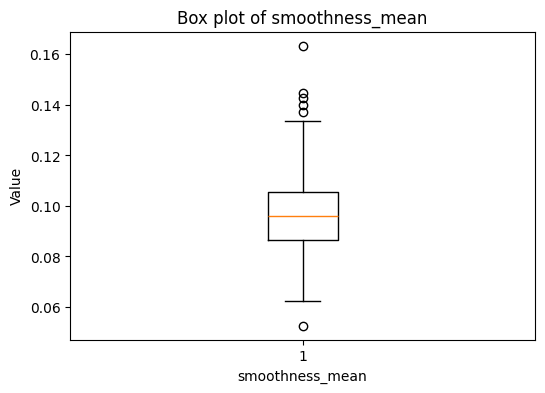

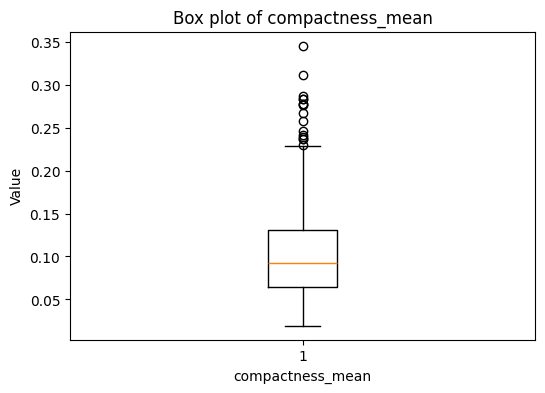

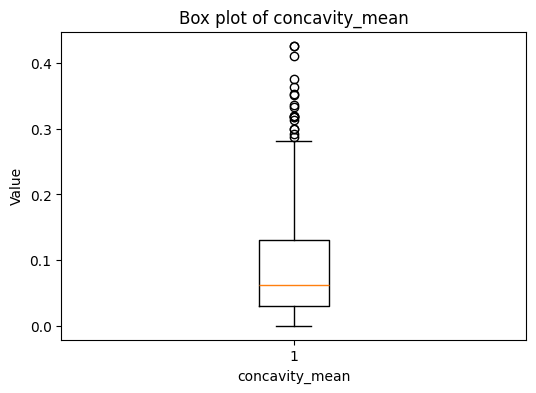

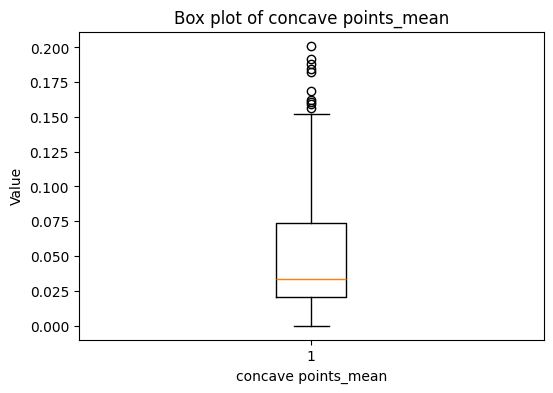

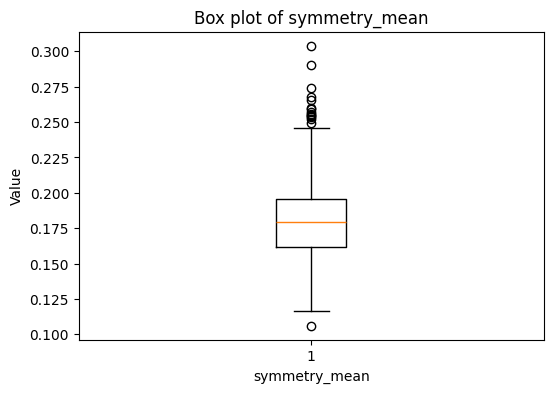

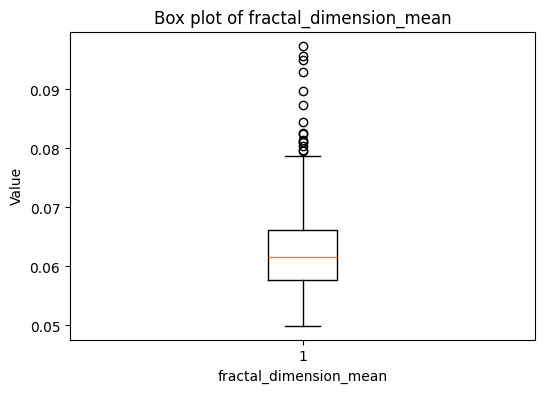

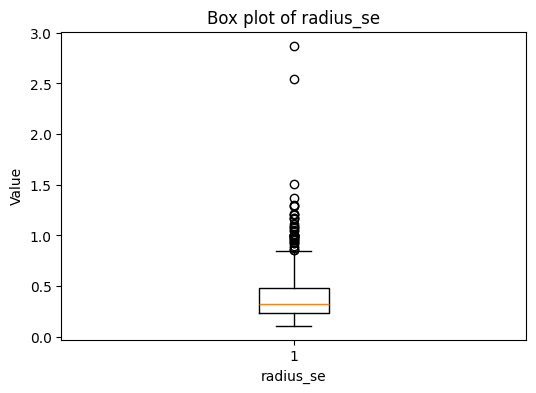

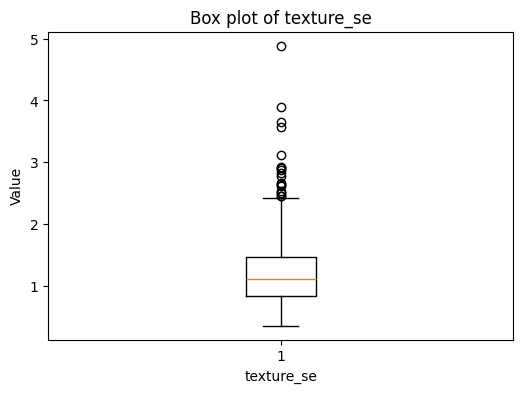

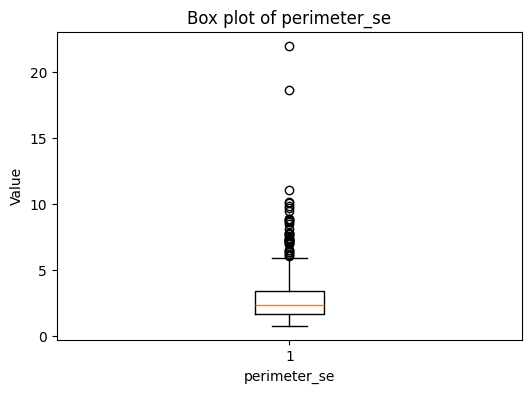

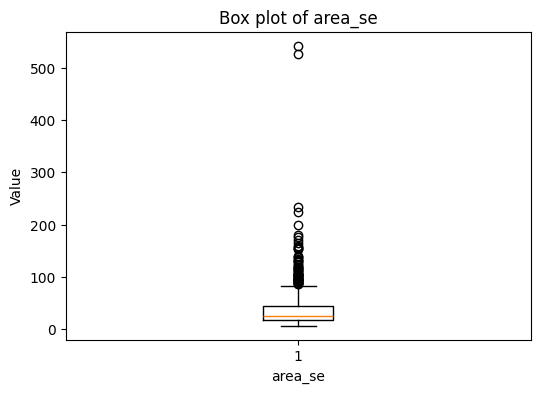

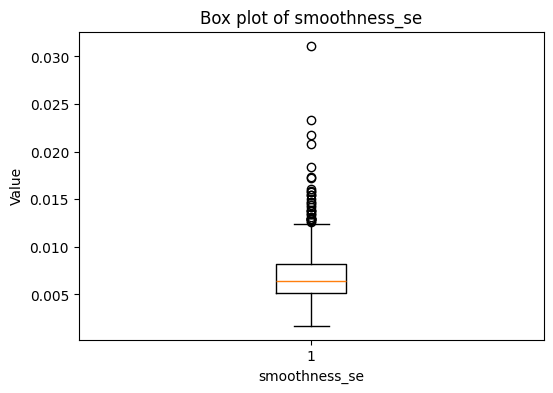

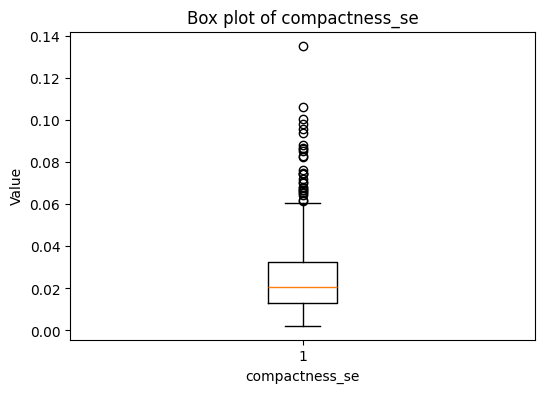

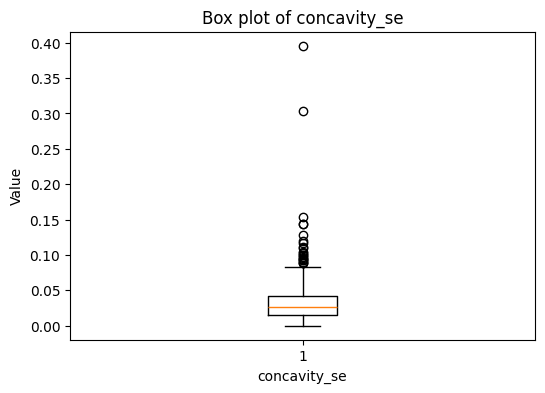

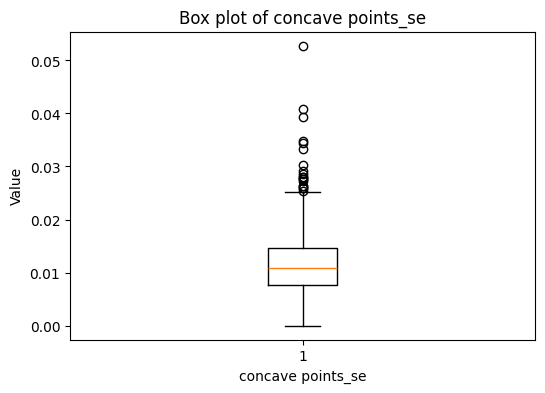

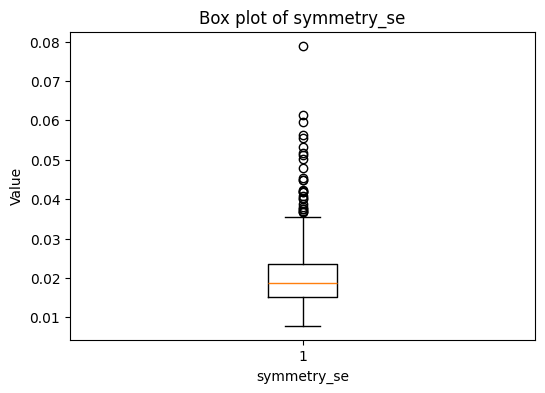

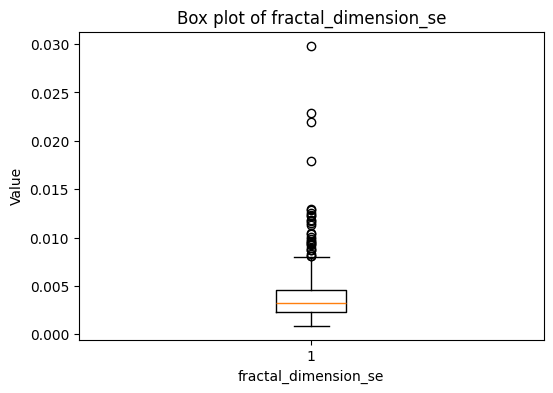

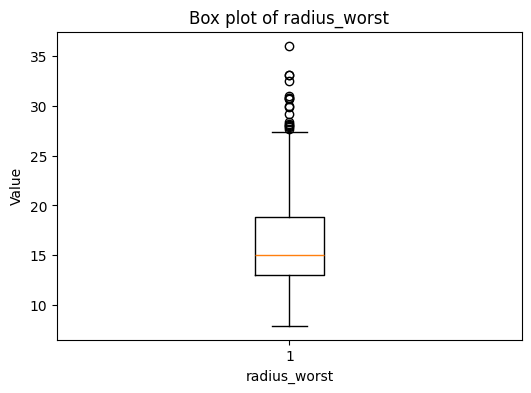

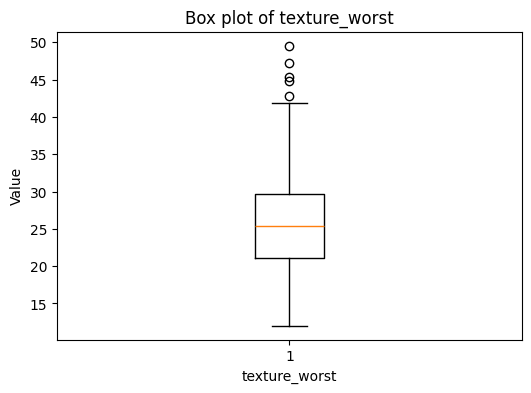

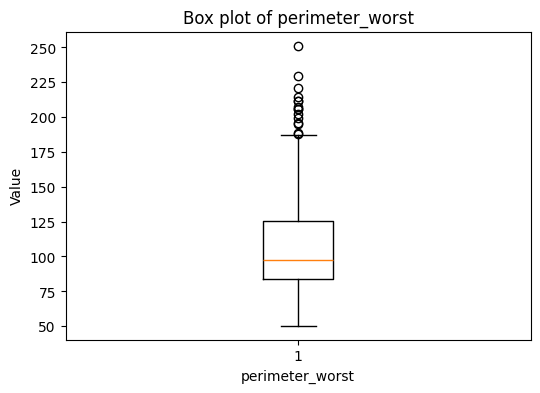

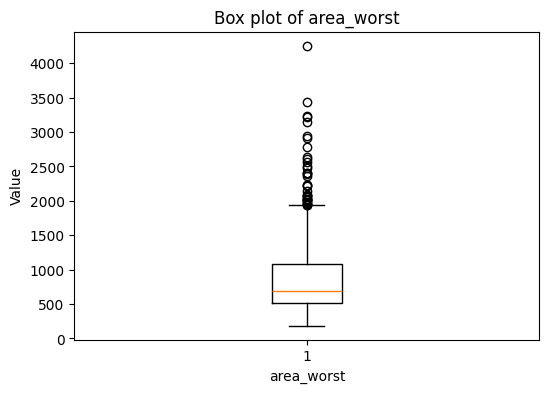

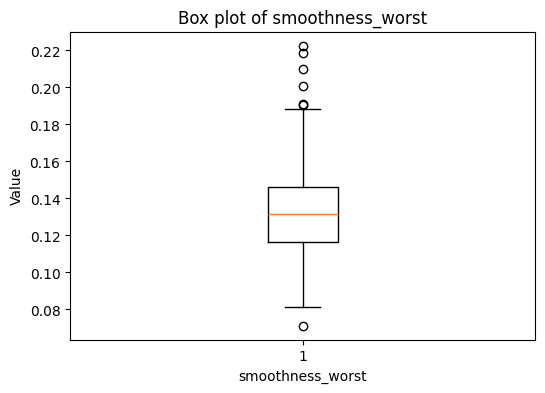

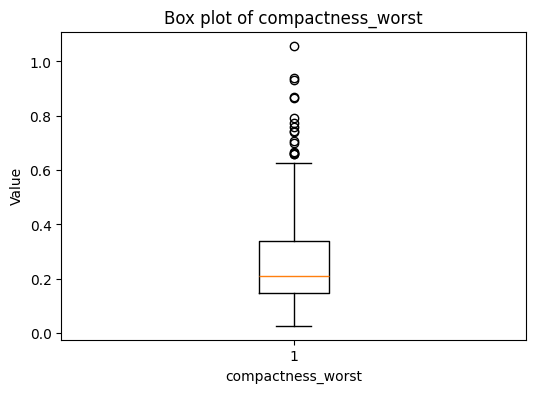

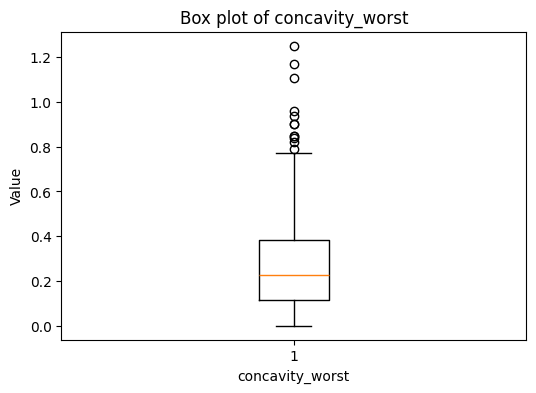

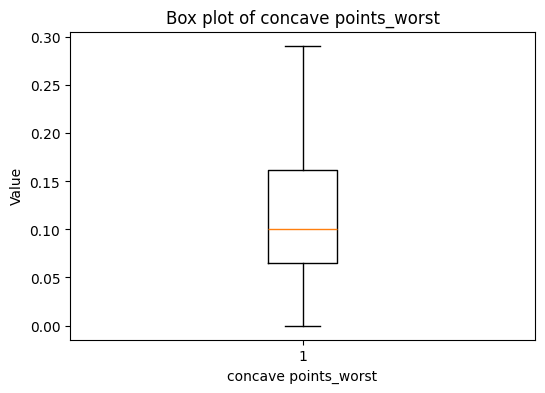

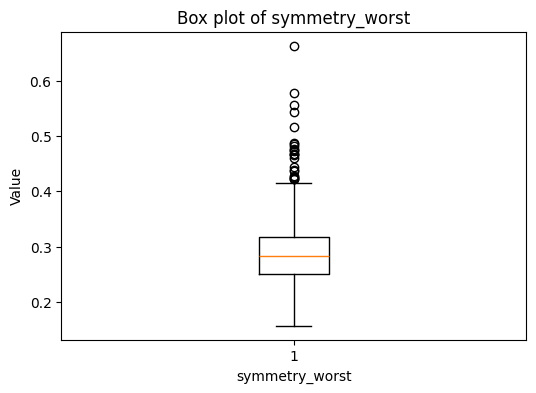

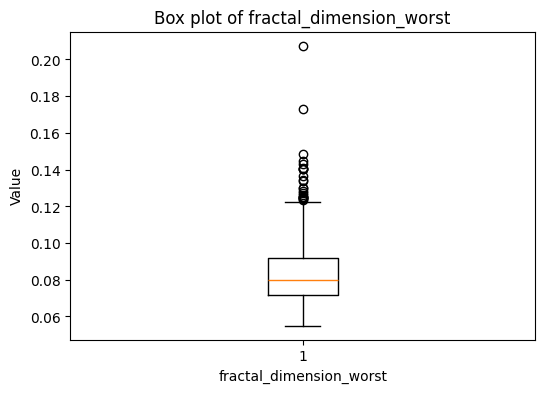

In [ ]:
import matplotlib.pyplot as plt

# Plot box plots for each feature in X
for column in X.columns:
    plt.figure(figsize=(6, 4))
    plt.boxplot(X[column])
    plt.xlabel(column)
    plt.ylabel("Value")
    plt.title(f"Box plot of {column}")
    plt.show()

In [ ]:
def remove_outliers_iqr(data, columns=None):


    data_clean = data.copy()
    outlier_info = {}

    if columns is None:
        columns = data_clean.select_dtypes(include=np.number).columns

    for col in columns:
        Q1 = data_clean[col].quantile(0.25)
        Q3 = data_clean[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = data_clean[
            (data_clean[col] < lower_bound) | (data_clean[col] > upper_bound)
        ]

        outlier_info[col] = outliers.shape[0]

        data_clean = data_clean[
            (data_clean[col] >= lower_bound) & (data_clean[col] <= upper_bound)
        ]

    return data_clean, outlier_info

In [ ]:
print("Shape before removing outliers:", data.shape)

data_clean, outlier_info = remove_outliers_iqr(data)

print("Shape after removing outliers:", data_clean.shape)

print("\nOutliers removed per column:")
for col, count in outlier_info.items():
    print(f"{col}: {count}")

Shape before removing outliers: (569, 32)
Shape after removing outliers: (233, 32)

Outliers removed per column:
id: 81
radius_mean: 11
texture_mean: 3
perimeter_mean: 3
area_mean: 28
smoothness_mean: 5
compactness_mean: 13
concavity_mean: 11
concave points_mean: 4
symmetry_mean: 6
fractal_dimension_mean: 8
radius_se: 19
texture_se: 13
perimeter_se: 10
area_se: 22
smoothness_se: 13
compactness_se: 12
concavity_se: 7
concave points_se: 3
symmetry_se: 12
fractal_dimension_se: 7
radius_worst: 7
texture_worst: 1
perimeter_worst: 2
area_worst: 7
smoothness_worst: 2
compactness_worst: 16
concavity_worst: 2
concave points_worst: 2
symmetry_worst: 2
fractal_dimension_worst: 4


In [ ]:

X_clean, _ = remove_outliers_iqr(X)
y_clean = y.loc[X_clean.index]

print("Original shape of X:", X.shape)
print("Cleaned shape of X:", X_clean.shape)
print("Original shape of y:", y.shape)
print("Cleaned shape of y:", y_clean.shape)

Original shape of X: (569, 31)
Cleaned shape of X: (233, 31)
Original shape of y: (569,)
Cleaned shape of y: (233,)



**Observation**:

Original dataset: 569 samples × 32 features

After removing outliers with IQR: 233 samples × 32 features

This means more than half of the samples were removed, mainly due to extreme values in certain features.

**Implications**:

Data loss: Removing too many samples may reduce the statistical power of the model.

Feature impact: Some features (like id, area_mean, radius_se) contributed most to outlier removal.

Potential over-cleaning: Strict IQR thresholds (1.5×IQR) may remove legitimate variations, not just true anomalies.

**Possible alternatives to avoid data loss**:

Adjust IQR multiplier: Use 2×IQR or 2.5×IQR to be less aggressive.

Feature-wise treatment: Remove outliers only for highly skewed features instead of all numeric columns.

Transform instead of removing: Apply log, sqrt, or scaling to reduce the effect of extreme values without deleting samples.

Robust models: Some models like tree-based methods (Random Forest, XGBoost) are less sensitive to outliers.

Replace outliers with median: Instead of deleting rows, replace extreme values with the median of the feature to preserve all samples while reducing the impact of outliers.

**Key takeaway**:

Outlier removal improves data cleanliness but can dramatically reduce dataset size, which may affect model performance and generalization.

Using median replacement or transformations can help balance cleaning with data preservation.

In [ ]:

numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

def replace_outliers_with_median(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = series.median()

    if ((series < lower_bound) | (series > upper_bound)).any():
        return series.apply(lambda x: median if x < lower_bound or x > upper_bound else x)
    else:
        return series

for col in numeric_cols:
    data[col] = replace_outliers_with_median(data[col])

print("Number of rows after outlining correction:", len(data))
data.head()


Number of rows after outlining correction: 569


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,906024.0,M,17.99,10.38,122.80,551.1,0.11840,0.09263,0.06154,0.03350,...,14.97,17.33,97.66,686.5,0.1622,0.2119,0.7119,0.2654,0.2822,0.08004
1,906024.0,M,20.57,17.77,132.90,551.1,0.08474,0.07864,0.08690,0.07017,...,14.97,23.41,158.80,686.5,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,906024.0,M,19.69,21.25,130.00,551.1,0.10960,0.15990,0.19740,0.12790,...,14.97,25.53,152.50,686.5,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,906024.0,M,11.42,20.38,77.58,386.1,0.09587,0.09263,0.06154,0.10520,...,14.91,26.50,98.87,567.7,0.1313,0.2119,0.6869,0.2575,0.2822,0.08004
4,906024.0,M,20.29,14.34,135.10,551.1,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,686.5,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [119]:
X=data.drop(columns=['diagnosis'])
y=data['diagnosis']

In [120]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

##**svm**

In [121]:

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC())
])

param_grid = {
    "svm__C": [0.1, 1, 10, 100],
    "svm__gamma": [0.001, 0.01, 0.1, 1],
    "svm__kernel": ["linear", "rbf"]
}


grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid.fit(X_train, y_train)
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("Best parameters:", grid.best_params_)
print("Test accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Best parameters: {'svm__C': 1, 'svm__gamma': 0.1, 'svm__kernel': 'rbf'}
Test accuracy: 0.9824561403508771
              precision    recall  f1-score   support

           B       0.99      0.99      0.99        72
           M       0.98      0.98      0.98        42

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [123]:
from sklearn.metrics import accuracy_score

# Train accuracy
y_train_pred = best_model.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)

# Test accuracy
y_test_pred = best_model.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Train accuracy: {train_acc:.3f}")
print(f"Test accuracy: {test_acc:.3f}")

if train_acc - test_acc > 0.05:  # threshold example
    print("Warning: Possible overfitting")
else:
    print("No significant overfitting detected")


Train accuracy: 0.998
Test accuracy: 0.982
No significant overfitting detected


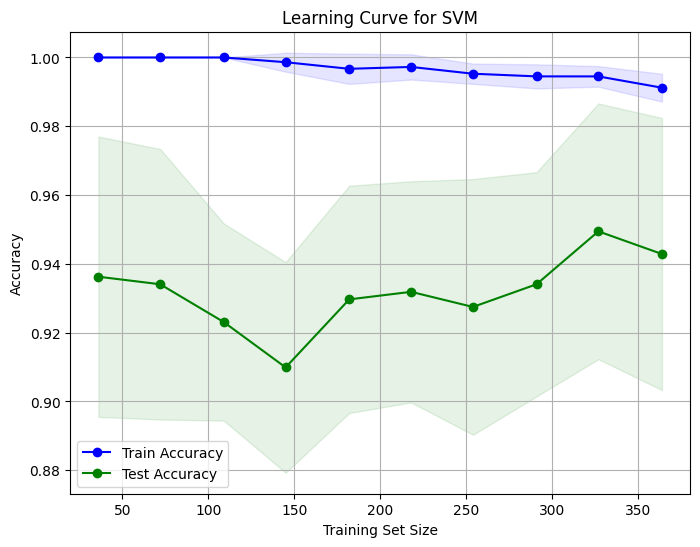

In [129]:
from sklearn.model_selection import learning_curve


model = best_model

train_sizes, train_scores, test_scores = learning_curve(
    model,
    X_train,
    y_train,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Train Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Test Accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='green')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve for SVM')
plt.legend()
plt.grid(True)
plt.show()


##**LogisticRegression**

In [115]:
from sklearn.linear_model import LogisticRegression
lr_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LogisticRegression(max_iter=1000))
])

param_grid = {
    "lr__C": [0.01, 0.1, 1, 10, 100],
    "lr__penalty": ["l1", "l2"],
    "lr__solver": ["liblinear"]
}

grid = GridSearchCV(lr_pipeline, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)

print("Best parameters:", grid.best_params_)
print("Test accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Best parameters: {'lr__C': 0.1, 'lr__penalty': 'l2', 'lr__solver': 'liblinear'}
Test accuracy: 0.9824561403508771
              precision    recall  f1-score   support

           B       0.99      0.99      0.99        72
           M       0.98      0.98      0.98        42

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [124]:
from sklearn.metrics import accuracy_score

# Train accuracy
best_model = grid.best_estimator_
y_train_pred = best_model.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)

# Test accuracy
y_test_pred = best_model.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Train accuracy: {train_acc:.3f}")
print(f"Test accuracy: {test_acc:.3f}")

if train_acc - test_acc > 0.05:  # threshold example
    print("Warning: Possible overfitting")
else:
    print("No significant overfitting detected")


Train accuracy: 0.998
Test accuracy: 0.982
No significant overfitting detected


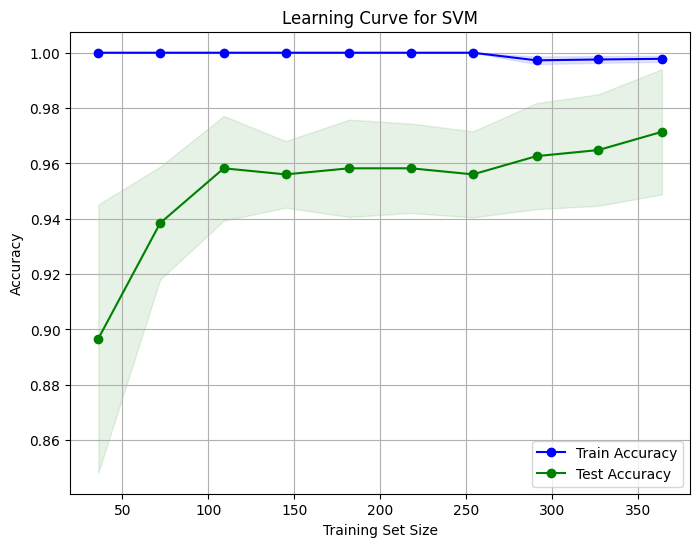

In [131]:
from sklearn.model_selection import learning_curve


model = grid.best_estimator_

train_sizes, train_scores, test_scores = learning_curve(
    model,
    X_train,
    y_train,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Train Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Test Accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='green')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve for SVM')
plt.legend()
plt.grid(True)
plt.show()



Both SVM (RBF kernel) and Logistic Regression achieve ~98% test accuracy.

Main reasons:

The dataset is clean, moderate-sized, and nearly linearly separable.

Standard preprocessing (scaling, outlier handling) benefits both models equally.

GridSearchCV finds optimal hyperparameters for both.


##**RandomForestClassifier**

In [125]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("rf", RandomForestClassifier(random_state=42))
])

rf_param_grid = {
    "rf__n_estimators": [50, 100, 200],
    "rf__max_depth": [None, 5, 10],
    "rf__min_samples_split": [2, 5, 10]
}

rf_grid = GridSearchCV(rf_pipeline, rf_param_grid, cv=5, scoring="accuracy", n_jobs=-1)
rf_grid.fit(X_train, y_train)
y_pred_rf = rf_grid.predict(X_test)

print("Random Forest Best Parameters:", rf_grid.best_params_)
print("Random Forest Test Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Best Parameters: {'rf__max_depth': None, 'rf__min_samples_split': 5, 'rf__n_estimators': 100}
Random Forest Test Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

           B       0.95      1.00      0.97        72
           M       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



In [126]:
from sklearn.metrics import accuracy_score
best_model = rf_grid.best_estimator_
# Train accuracy
y_train_pred = best_model.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)

# Test accuracy
y_test_pred = best_model.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Train accuracy: {train_acc:.3f}")
print(f"Test accuracy: {test_acc:.3f}")

if train_acc - test_acc > 0.05:  # threshold example
    print("Warning: Possible overfitting")
else:
    print("No significant overfitting detected")


Train accuracy: 0.998
Test accuracy: 0.965
No significant overfitting detected


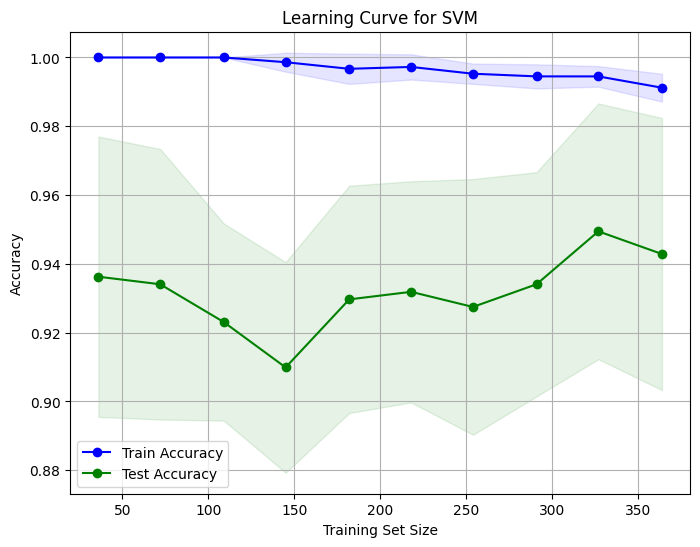

In [132]:
from sklearn.model_selection import learning_curve


model = best_model

train_sizes, train_scores, test_scores = learning_curve(
    model,
    X_train,
    y_train,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Train Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Test Accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='green')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve for SVM')
plt.legend()
plt.grid(True)
plt.show()

##**DecisionTreeClassifier**


In [117]:
from sklearn.tree import DecisionTreeClassifier

dt_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("dt", DecisionTreeClassifier(random_state=42))
])

dt_param_grid = {
    "dt__max_depth": [None, 5, 10],
    "dt__min_samples_split": [2, 5, 10]
}

dt_grid = GridSearchCV(dt_pipeline, dt_param_grid, cv=5, scoring="accuracy", n_jobs=-1)
dt_grid.fit(X_train, y_train)

y_pred_dt = dt_grid.predict(X_test)

print("Decision Tree Best Parameters:", dt_grid.best_params_)
print("Decision Tree Test Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Best Parameters: {'dt__max_depth': 5, 'dt__min_samples_split': 2}
Decision Tree Test Accuracy: 0.9473684210526315
              precision    recall  f1-score   support

           B       0.92      1.00      0.96        72
           M       1.00      0.86      0.92        42

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [127]:
from sklearn.metrics import accuracy_score
best_model = dt_grid.best_estimator_

# Train accuracy
y_train_pred =best_model.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)

# Test accuracy
y_test_pred = best_model.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Train accuracy: {train_acc:.3f}")
print(f"Test accuracy: {test_acc:.3f}")

if train_acc - test_acc > 0.05:  # threshold example
    print("Warning: Possible overfitting")
else:
    print("No significant overfitting detected")


Train accuracy: 0.993
Test accuracy: 0.947
No significant overfitting detected


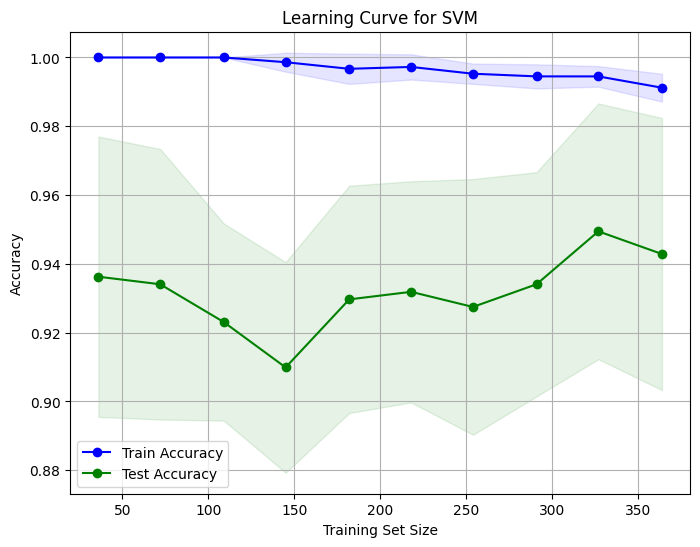

In [133]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

model = best_model

train_sizes, train_scores, test_scores = learning_curve(
    model,
    X_train,
    y_train,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Train Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Test Accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='green')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve for SVM')
plt.legend()
plt.grid(True)
plt.show()



### **1. Comparison Table of Four Models on Breast Cancer Dataset**

| Model               | Best Parameters                                         | Test Accuracy | Precision (B / M) | Recall (B / M) | F1-score (B / M) |
| ------------------- | ------------------------------------------------------- | ------------- | ----------------- | -------------- | ---------------- |
| SVM                 | `C=1, gamma=0.1, kernel='rbf'`                          | 0.9825        | 0.99 / 0.98       | 0.99 / 0.98    | 0.99 / 0.98      |
| Logistic Regression | `C=0.1, penalty='l2', solver='liblinear'`               | 0.9825        | 0.99 / 0.98       | 0.99 / 0.98    | 0.99 / 0.98      |
| Random Forest       | `max_depth=None, min_samples_split=5, n_estimators=100` | 0.9649        | 0.95 / 1.00       | 1.00 / 0.90    | 0.97 / 0.95      |
| Decision Tree       | `max_depth=5, min_samples_split=2`                      | 0.9474        | 0.92 / 1.00       | 1.00 / 0.86    | 0.96 / 0.92      |



### **2. Analysis and Comparison of Models**

1. **SVM and Logistic Regression**

   * Very high and almost identical accuracy (~98%).
   * Reason: The dataset is nearly linearly separable, preprocessing was consistent, and GridSearchCV found optimal hyperparameters.
   * Performance is **balanced for both classes** (Benign and Malignant).

2. **Random Forest**

   * Slightly lower accuracy (~96%).
   * Recall for class M = 0.90 → some Malignant samples were misclassified.
   * The model is robust and resistant to noise, but slightly sensitive to small class distributions.
   * Precision and F1-score remain high → good overall performance but slightly below SVM/LR.

3. **Decision Tree**

   * Accuracy ~95%, the lowest among the four models.
   * Recall for class M = 0.86 → some Malignant samples misclassified.
   * Simple and interpretable model, but may **overfit** and is less stable than Random Forest.



### **3. Key Takeaways**

* The **Breast Cancer dataset is linearly or nearly linearly separable**, so linear algorithms (SVM and Logistic Regression) achieve the **best performance**.
* **Tree-based models** (Random Forest / Decision Tree) perform slightly worse, especially for smaller or imbalanced classes.
* **If maximum accuracy is the goal → SVM or Logistic Regression** are the best choices.
* **If interpretability is important → Decision Tree** is suitable.
* **Random Forest** provides a balance between accuracy and overfitting resistance.

